# **Task D1**
## Analyzing YouTube Video Data from News Publishers

##### This task focuses on analyzing YouTube videos about a news topic (e.g., Covid-19) published by at least 4 English news publishers (e.g., BBC, Fox News, ...) from a start date to an end date. You will need to specify the news topic and the list of keywords to search for the videos about that topic on YouTube. Also, you will need to extract the channel IDs of the news publishers using the function get_channel_info() given to you in the attached "collect.ipynb" file. All settings need to be specified in Section B (Settings) of "collect.ipynb" and also copied into Section B (Settings) of this jupyter notebook (D1.ipynb). Please note the terms "News Publisher" and "Channel" have been used interchangeably in this task (each news publisher has a channel - if a news publisher has more than one channels on YouTube, pick any and state that in your TaskCompletionReport). The following instructions convey important information about the task. Please **read them carefully** and complete the task. If you need any clarification please    
<img src="youtube.png" alt="SIT112 Avocado!" width="1800" height="200">

### A. Instructions
#### Attachments
* directions.pdf
* collect.ipynb
* credentials-sample.ini
* video-presentation-guideline.pdf

#### Get Started 
1. Rename the "credentials-sample.ini" file to "credentials.ini" and follow the instructions. 
2. Creat your YouTube API key and assign it to developer_key in the credentials.ini file. You will need the YouTube API key to get access to the YouTube API (collect the data). See the following video: https://youtu.be/N18czV5tj5o (the video is not up to date; the instrucitons might be sighly different. You can view the following link for more details: https://developers.google.com/youtube/v3/getting-started). Please note Projects that enable the YouTube Data API have a default quota allocation of 10,000 units per day; to make an efficient use of your quota, please avoid multiple excecutions of the "collect.ipynb" file: https://developers.google.com/youtube/v3/guides/quota_and_compliance_audits. 
3. To work with the YouTube API (send queries), you need to install Google API Python Client using: "conda install google-api-python-client" 
#### Specify the news topic and news publishers (channels)
4. Choose a news topic (e.g., Covid-19) and a list of keywords to be used for finding videos about that topic. You can extract the keywords by looking at some sample video titles. 
5. Choose at least 4 popular English news publishers (e.g., BBC, Fox News).
6. Extract, manually, the video IDs of sample videos from different  news publishers (channels). You can do so by clicking on the share button for each video. 
7. Extract the Channel IDs of the videos using the get_channel_info() function in collect.ipynb 
#### Collect the Videos and Comments using "collect.ipynb" 
8. Specify the Channel IDs and names in the Settings section of the attached "collect.ipynb" file (CHANNELS = {...})
9. Specify the list keywords in the Settings section of the attached collect.ipynb file (KEYWORDS = [...])
10. Specify the START_DATE and END_DATE in the Settings section of the attached collect.ipynb file
11. Specify the MAX_VIDEOS such that you can extract **at least 20 videos per news publisher (channel)**. Make sure for your specified topic, **at least 300 comments per news publisher (channel)** can be collected. Please note some publishers might have disabled comments.
12. Please **do not make any changes to the "collect.ipynb" file**
13. Execute the collect.ipynb file to collect the videos (will be stored in videos.csv) and the comments on those videos (will be stored in comments.csv).
#### Complete the Task
14. <font color='red'> Choose only 2 quesitons from Section E1 and only 1 quesiton from Section E2 </font> and answer them based on the hints. Please note, for each question, you must **briefly discuss your observations** based on the results.
15. Please note **there is no unique solution** for most questions; if you need to make any assumptions, **state your assumptions** in the comments and in your TaskCompletionReport and answer the question accordingly. Please also note, **if something has not been clearly stated in a question (e.g., the type of visualization, etc) it means you are allowed to make your own choice**. 
16. **Read the attached "video-presentation-guideline.pdf"** carefully and record a video clip (based on video-presentation-guideline.pdf) that presents your completed task. Upload the video on a video repository such as YouTube (or any other preferred repository) and provide the link in the TaskCompletionReport. 
17. Complete the TaskCompletionReport form.

#### Submit the Task
18. Please make sure you have copied the settings from collect.ipynb into your solution file (D1.ipynb), under section B (settings).  
19. Please make sure you have executed and saved all the cells in your jupyter notebook without any error; otherwise, your submission may not be flagged as complete. 
20. Please make sure you have included the link to the video recording of your presentation in your TaskCompletionReport. 
21. Submit (1) the TaskCompletionReport as a "PDF" file and (2) your solution file (D1.ipynb) as an "ipynb" file (do not zip/combine them). Please do not include "collect.ipynb" in your submission. 

Good luck :)

### B. Settings
Copy your settings from Section B of the "collect.ipynb" file below. 

In [79]:
import importlib
import subprocess

# The following lines should install all libraries you need - you can install the libraries manually if the script did not work 
required_modules = ['pandas', 'seaborn', 'matplotlib', 'google-api-python-client', 'datetime', 'configparser', 'nltk', 'langdetect', 'textblob', 'prettytable', 'tabulate', 'numpy']
for module in required_modules:
    try:
        importlib.import_module(module)
    except ImportError:
        print(f"{module} module not found. Installing...")
        subprocess.check_call(['pip', 'install', module])

print("All required modules are installed.")

# import the installed libraries ...
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from datetime import datetime
import os
from configparser import ConfigParser
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from langdetect import detect
import langdetect
from textblob import TextBlob
import calendar
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from prettytable import PrettyTable
from tabulate import tabulate
import numpy as np
from collections import defaultdict
import warnings

google-api-python-client module not found. Installing...
All required modules are installed.


[nltk_data] Downloading package stopwords to /Users/krish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [80]:
def load_credentials():
    try:
        config = ConfigParser(interpolation=None)
        config.read(CREDENTIALS_FILE)
        developer_key = config.get('credentials_youtube', 'developer_key', fallback=None)
        service_name = config.get('credentials_youtube', 'service_name', fallback=None)
        service_version = config.get('credentials_youtube', 'service_version', fallback=None)
        if not developer_key or not service_name or not service_version:
            raise ValueError("Invalid credentials file")

        return {
            'developer_key' : developer_key,
            'service_name' : service_name,
            'service_version' : service_version
        }
    except Exception as e:
        raise ValueError("Failed to load credentials: {}".format(str(e)))

In [81]:
VIDEOS_FILE = "videos.csv"
COMMENTS_FILE = "comments.csv"
CREDENTIALS_FILE = 'credentials.ini'
START_DATE = datetime(2020, 1, 1)
END_DATE = datetime(2023, 1, 1)
KEYWORDS =['coronavirus', 'covid', 'covid-19', 'pandemic']
# You can use functin get_channel_info() to extract the channel ID of a sample video from a news publisher ...

CHANNELS = {
    'UCXIJgqnII2ZOINSWNOGFThA' : 'Fox News',
    'UC16niRr50-MSBwiO3YDb3RA' : 'BBC News',
    'UCupvZG-5ko_eiXAupbDfxWw' : 'CNN',
    'UCaXkIU1QidjPwiAYu6GcHjg' : 'MSNBC'
}
MAX_VIDEOS = 50 # the maximum number of video that should be returned for each request. Acceptable values are 0 to 50
QUERY= f"intitle:{','.join(KEYWORDS)}"
# This function takes a video ID and a YouTube Object and returns the video's channel ID
# See Section H (call the functions) to learn how to use this function

### C. Imports
You need to import the following libraries. Install the libraries using "conda install ... or pip install ..." if they have not been installed on your machine. For example you can install google api python client by executing "conda install google-api-python-client"

### D. Clean and Prepare the Data

In [82]:
VIDEO_CATEGORIES = {
    '1': 'Film & Animation',
    '2': 'Autos & Vehicles',
    '10': 'Music',
    '15': 'Pets & Animals',
    '17': 'Sports',
    '19': 'Travel & Events',
    '20': 'Gaming',
    '22': 'People & Blogs',
    '23': 'Comedy',
    '24': 'Entertainment',
    '25': 'News & Politics',
    '26': 'Howto & Style',
    '27': 'Education',
    '28': 'Science & Technology',
    '29': 'Nonprofits & Activism'
}

In [83]:
youtube = build(credentials['service_name'],credentials['service_version'],developerKey=credentials['developer_key'])
def get_channel_videos(channel_ids, start_date, end_date, query, video_categories, max_videos=50):
    df_list = []
    for channel_id in channel_ids: 
        print(f"-> collecting videos for channel: {CHANNELS[channel_id]}")
        try:
            request = youtube.search().list(
                part="snippet",
                type='video',
                channelId=channel_id,
                maxResults=max_videos, # specifies the maximum number of items that should be returned in the result set. Acceptable values are 0 to 50, inclusive.
                q=query,
                publishedAfter=start_date.strftime("%Y-%m-%dT%H:%M:%SZ"),
                publishedBefore=end_date.strftime("%Y-%m-%dT%H:%M:%SZ")
            )
            response = request.execute()
            videos = response['items']
            data = []
            for video in videos:
                video_id = video['id']['videoId']
                video_details = youtube.videos().list(
                    part="snippet,statistics,contentDetails",
                    id=video_id
                ).execute()
                video_data = {
                    'video_id' : video_id,
                    'channel_id' : channel_id,
                    'video_title': video_details['items'][0]['snippet']['title'],
                    'channel_title': video_details['items'][0]['snippet']['channelTitle'],
                    'category_name': video_categories.get(str(video_details['items'][0]['snippet']['categoryId']), 'Unknown'),
                    'live_upcoming_none' : video_details['items'][0]['snippet']['liveBroadcastContent'],
                    'view_count': video_details['items'][0]['statistics'].get('viewCount', 0),
                    'like_count': video_details['items'][0]['statistics'].get('likeCount', 0),
                    'dislike_count': video_details['items'][0]['statistics'].get('dislikeCount', 0),
                    'comment_count': video_details['items'][0]['statistics'].get('commentCount', 0),
                    'published_at': video_details['items'][0]['snippet']['publishedAt'],
                    'tags': ','.join(video_details['items'][0]['snippet'].get('tags', [])),
                    'duration': video_details['items'][0]['contentDetails'].get('duration', ''),
                    'definition': video_details['items'][0]['contentDetails'].get('definition', 'unknown'),
                    'caption': video_details['items'][0]['contentDetails'].get('caption', 'false'),
                    'thumbnail' : video_details['items'][0]['snippet']['thumbnails']['default'].get('url'),
                    'url': 'https://www.youtube.com/watch?v={}'.format(video_id)
                }
                data.append(video_data)
            df = pd.DataFrame(data)
            df_list.append(df)
        except HttpError as e:
            print(f'An HTTP error {e.resp.status} occurred:\n{e.content}')
    df_concatenated = pd.concat(df_list, axis=0)
    df_concatenated.to_csv(VIDEOS_FILE, mode='w', index=False)
    return df_concatenated

print(get_channel_videos(CHANNELS, START_DATE, END_DATE, QUERY,VIDEO_CATEGORIES, MAX_VIDEOS))


-> collecting videos for channel: Fox News
-> collecting videos for channel: BBC News
-> collecting videos for channel: CNN
-> collecting videos for channel: MSNBC
       video_id                channel_id  \
0   d1eEWihvwpQ  UCXIJgqnII2ZOINSWNOGFThA   
1   lydWQoqDNp8  UCXIJgqnII2ZOINSWNOGFThA   
2   jXHikITwlng  UCXIJgqnII2ZOINSWNOGFThA   
3   2j3YtPVBT30  UCXIJgqnII2ZOINSWNOGFThA   
4   DZLQRA5XwPY  UCXIJgqnII2ZOINSWNOGFThA   
..          ...                       ...   
45  BCjqqqfCggw  UCaXkIU1QidjPwiAYu6GcHjg   
46  0BPWtYPkDS4  UCaXkIU1QidjPwiAYu6GcHjg   
47  0tSACr4-fW8  UCaXkIU1QidjPwiAYu6GcHjg   
48  z43onGU9ul4  UCaXkIU1QidjPwiAYu6GcHjg   
49  yOFXVdIwH6s  UCaXkIU1QidjPwiAYu6GcHjg   

                                          video_title channel_title  \
0        WHO declares coronavirus outbreak a pandemic      Fox News   
1         Tucker: Coronavirus pandemic is a real fear      Fox News   
2   Bill Gates on his 2015 'virus' warning, effort...      Fox News   
3   NY Gov 

In [84]:
def get_videos_comments():
    videos = pd.read_csv(VIDEOS_FILE)
    video_ids = videos['video_id'].tolist()
    df_list =[]    
    # Loop through all the video IDs and retrieve the comments
    for video_id in video_ids:
        print(f"-> collecting comments for video: {video_id}")
        comments_list = []
        try:
            response = youtube.commentThreads().list(
                part='snippet',
                videoId=video_id,
                textFormat='plainText'
            ).execute()

            # Loop through all the comments and extract the relevant information
            for item in response['items']:
                comment_id = item['snippet']['topLevelComment']['id']
                comment_text = item['snippet']['topLevelComment']['snippet']['textDisplay']
                comment_author = item['snippet']['topLevelComment']['snippet']['authorDisplayName']
                comment_date = item['snippet']['topLevelComment']['snippet']['publishedAt']
                like_count = item['snippet']['topLevelComment']['snippet']['likeCount']
                reply_count = item['snippet']['totalReplyCount']
                comments_list.append([video_id, comment_id, comment_text, comment_author, comment_date, like_count, None])
                
                if reply_count > 0:
                    # Retrieve the replies to the top-level comment
                    reply_response = youtube.comments().list(
                        part='snippet',
                        parentId=comment_id,
                        textFormat='plainText'
                    ).execute()
                    
                    # Loop through all the replies and extract the relevant information
                    for reply_item in reply_response['items']:
                        reply_id = reply_item['id']
                        reply_text = reply_item['snippet']['textDisplay']
                        reply_author = reply_item['snippet']['authorDisplayName']
                        reply_date = reply_item['snippet']['publishedAt']
                        reply_like_count = reply_item['snippet']['likeCount']
                        comments_list.append([video_id, reply_id, reply_text, reply_author, reply_date, reply_like_count, comment_id])

        except HttpError as error:
            if error.resp.status == 403:
                print(f'Comments are disabled for video ID {video_id}. Skipping...')
            else:
                raise error
        
        df = pd.DataFrame(comments_list, columns=['video_id', 'comment_id', 'comment_text', 'comment_author', 'comment_date', 'comment_like_count', 'parent_comment_id'])
        df_list.append(df)
    df_concatenated = pd.concat(df_list, axis=0)
    df_concatenated.to_csv(COMMENTS_FILE, mode='w', index=False)
    return df_concatenated

print(get_videos_comments())

-> collecting comments for video: d1eEWihvwpQ
-> collecting comments for video: lydWQoqDNp8
-> collecting comments for video: jXHikITwlng
-> collecting comments for video: 2j3YtPVBT30
-> collecting comments for video: DZLQRA5XwPY
-> collecting comments for video: gkR0jipzPRA
-> collecting comments for video: ACLU0OxWisE
-> collecting comments for video: Z5cG6m0fYXY
-> collecting comments for video: eT47ulzfOMo
-> collecting comments for video: xhpqX1NbusQ
-> collecting comments for video: 6G_-qe0iMBs
-> collecting comments for video: lJcjFGt9eQM
-> collecting comments for video: zwX5z_BvaN4
-> collecting comments for video: 0pkwjVhq230
-> collecting comments for video: J0Kavkyn46U
-> collecting comments for video: VdK77bhAwO0
-> collecting comments for video: 3ebpS88BAwA
-> collecting comments for video: 0sDAuWZPR-4
-> collecting comments for video: a1vKEIzvE08
-> collecting comments for video: LmNOVFozyjo
-> collecting comments for video: aSBWlKC7reM
-> collecting comments for video: 

##### D.1. Write Python code that cleans the data for analyzing the videos and comments.

In [85]:
# a basic data cleaning has been performed on the collected data by the clean_data()function in collect.ipynb
# additionl data cleaning can be added here - if needed
nltk.download('stopwords')
def clean_data(VIDEOS_FILE, COMMENTS_FILE, stopwords):
    # Load videos data
    videos = pd.read_csv(VIDEOS_FILE)

    # Clean videos data
    videos['video_title'] = videos['video_title'].apply(lambda x: re.sub(r'[^\w\s]', '', x) if isinstance(x, str) else x) # remove punctuation
    videos['video_title'] = videos['video_title'].apply(lambda x: re.sub(r'\d+', '', x) if isinstance(x, str) else x) # remove digits
    videos['video_title'] = videos['video_title'].apply(lambda x: x.lower() if isinstance(x, str) else x) # convert to lowercase

    # Save cleaned videos data to new CSV file, replacing the existing file
    videos.to_csv(VIDEOS_FILE, index=False)

    # Load comments data
    comments = pd.read_csv(COMMENTS_FILE)

    # Clean comments data
    comments['comment_text'] = comments['comment_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x) if isinstance(x, str) else x)  # remove punctuation
    comments['comment_text'] = comments['comment_text'].apply(lambda x: re.sub(r'\d+', '', x) if isinstance(x, str) else x)  # remove digits
    comments['comment_text'] = comments['comment_text'].apply(lambda x: x.lower() if isinstance(x, str) else x)  # convert to lowercase

    # Remove duplicates
    comments = comments.drop_duplicates()

    # Remove rows with missing comment_text
    comments = comments.dropna(subset=['comment_text'])

    # Filter out comments that are not in English
    try:
        comments = comments[comments['comment_text'].apply(lambda x: langdetect.detect(x) == 'en')]
    except langdetect.LangDetectException as e:
        print(f"non-english comment skipped ... {e}")
    # Stopword removal
    stop_words = set(stopwords.words('english'))
    comments['comment_text'] = comments['comment_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

    # Save cleaned comments data to new CSV file, replacing the existing file
    comments.to_csv(COMMENTS_FILE, index=False)

print(clean_data(VIDEOS_FILE, COMMENTS_FILE, stopwords))  

non-english comment skipped ... No features in text.
None


[nltk_data] Downloading package stopwords to /Users/krish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### D.2. Write Python code that prepares the data for analyzing the videos and comments.

In [86]:
# A sample code for data preparation has been given below. Feel free to edit when needed

# Load the videos and comments dataframes from their respective CSV files
videos_df = pd.read_csv('videos.csv')
comments_df = pd.read_csv('comments.csv')

# Convert the published_at column to a datetime object for videos_df
videos_df['published_at'] = pd.to_datetime(videos_df['published_at'], format='%Y-%m-%dT%H:%M:%SZ')

# Create a new column that contains the published_at weekly
videos_df['published_at_week'] = videos_df['published_at'].dt.strftime('%Y-%m-%W')

# Create a new column that contains the published_at monthly
videos_df['published_at_month'] = videos_df['published_at'].dt.strftime('%Y-%m')

# Create a new column that contains the published_at monthly
videos_df['published_at_year'] = videos_df['published_at'].dt.strftime('%Y')

# Convert the published_at column to a datetime object for comments_df
comments_df['comment_date'] = pd.to_datetime(comments_df['comment_date'], format='%Y-%m-%dT%H:%M:%SZ')

# Create a new column that contains the published_at weekly
comments_df['comment_date_week'] = comments_df['comment_date'].dt.strftime('%Y-%m-%W')

# Create a new column that contains the published_at monthly
comments_df['comment_date_month'] = comments_df['comment_date'].dt.strftime('%Y-%m')

# Create a new column that contains the published_at monthly
comments_df['comment_date_year'] = comments_df['comment_date'].dt.strftime('%Y')

# Convert the duration column to seconds for videos_df
videos_df['duration'] = videos_df['duration'].apply(lambda x: re.findall(r'PT(\d+)M(\d+)S', x))
videos_df['duration'] = videos_df['duration'].apply(lambda x: int(x[0][0]) * 60 + int(x[0][1]) if len(x) > 0 else 0)

# Prepared DataFrame objects; can be used for data analysis
videos = videos_df.copy(deep=True)
comments = comments_df.copy(deep=True)
videos_comments_inner = pd.merge(videos,comments, on='video_id', how = 'inner') # merged videos and comments
videos_comments_left = pd.merge(videos,comments, on='video_id', how = 'left') # left-merged videos and comments

### E. Analyze the Videos and Comments

Please note you must **discuss your observations** for each question, in addition to the python code. 

#### E.1. Analyze the Videos and Comments - Part 1
* Choose **(only) 2** of the following questions (E.1.1 to E.1.7) and write Python code to answer them. 

##### E.1.1 Compare the distributions of the number of views, likes, and comments for the videos. Use visualization and discuss your observations. Your visualization must include three subplots, one for each variable (number of views, number of likes, number of comments), and each subplot must display a histogram of the respective variable overlayed by a kernel density function. Additionally, your visualization must have proper labels for the x and y axes, as well as a title for each subplot.

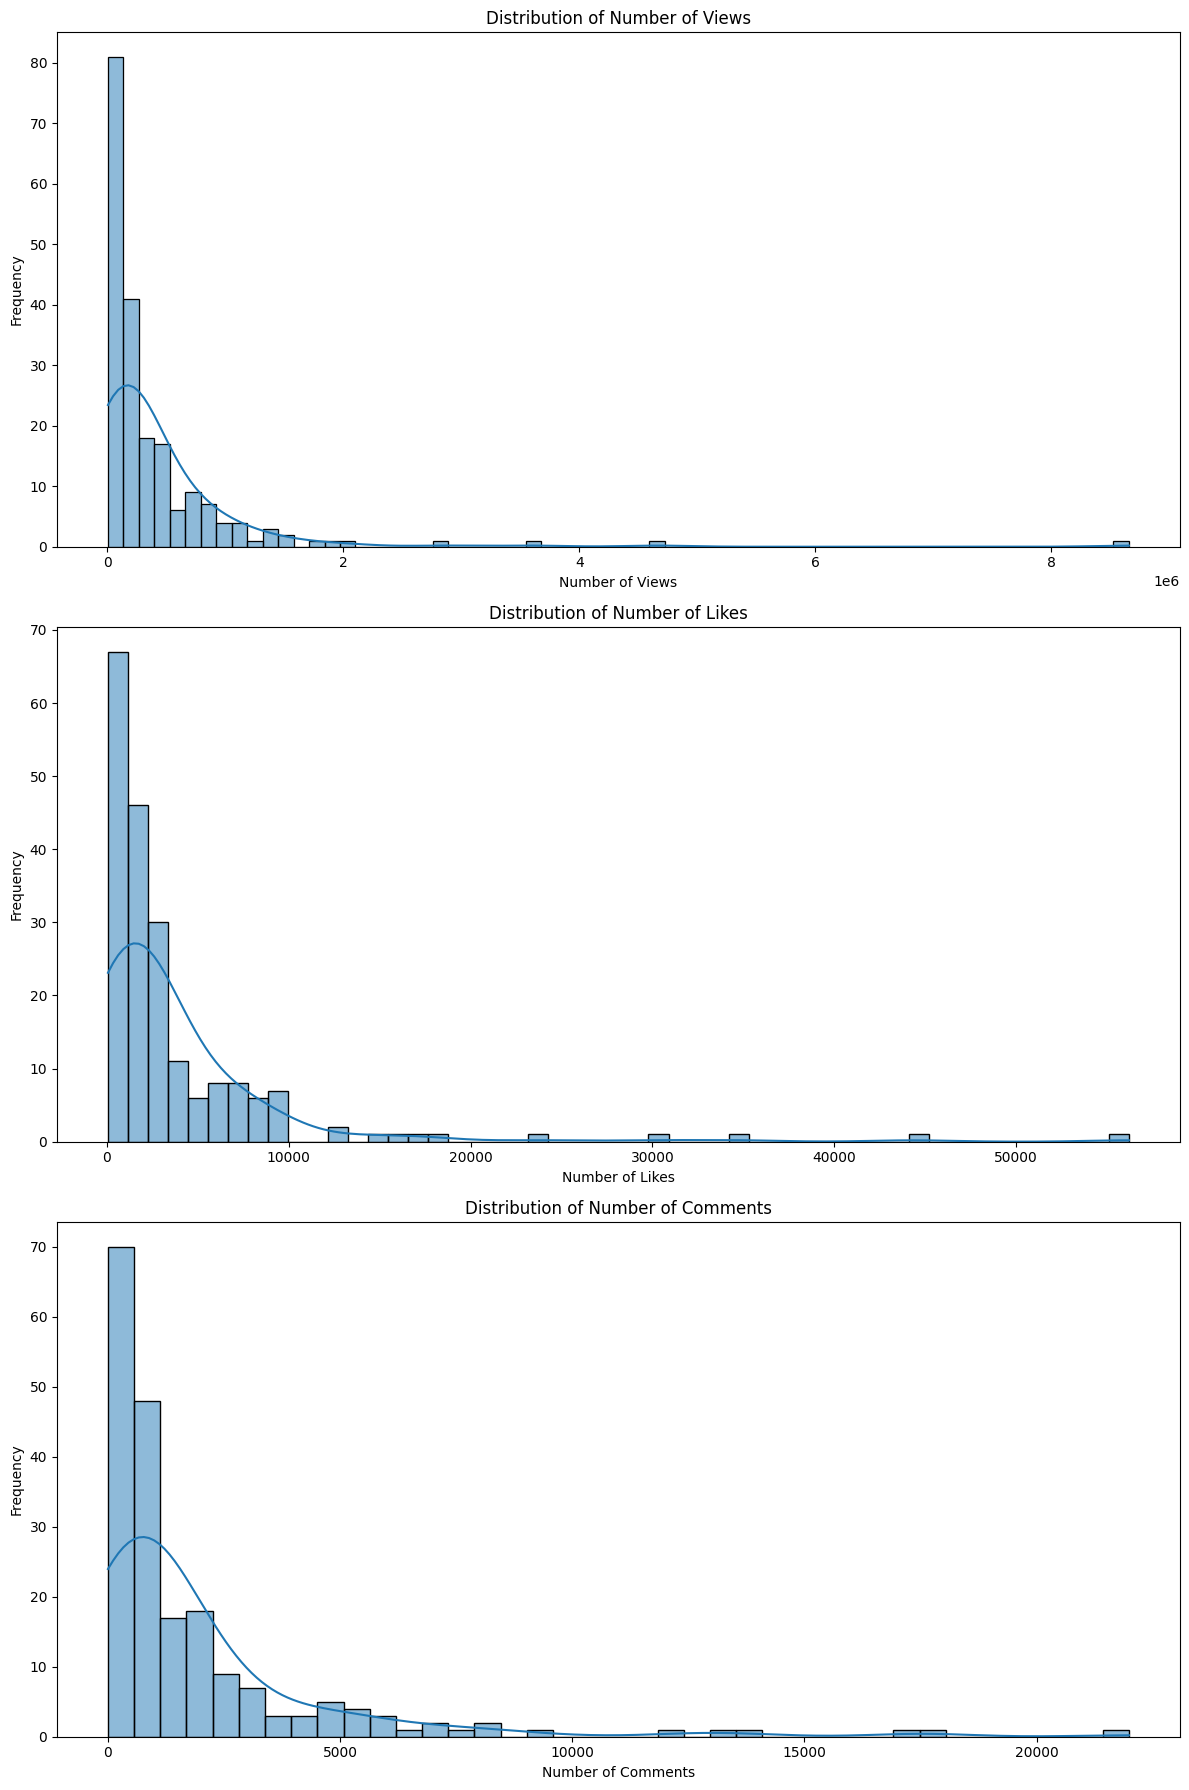

In [87]:
# Write your code here:

# Define the column names for which we want to create the histograms

# Create a figure with three subplots using a 1x3 grid

# Loop over the columns and plot a histogram on each subplot

# Customize and display the plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the videos data
videos = pd.read_csv('videos.csv')  # Make sure this file is the cleaned version from the clean_data function

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot the distribution of views
sns.histplot(videos['view_count'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Number of Views')
axes[0].set_xlabel('Number of Views')
axes[0].set_ylabel('Frequency')

# Plot the distribution of likes
sns.histplot(videos['like_count'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Number of Likes')
axes[1].set_xlabel('Number of Likes')
axes[1].set_ylabel('Frequency')

# Plot the distribution of comments
sns.histplot(videos['comment_count'], kde=True, ax=axes[2])
axes[2].set_title('Distribution of Number of Comments')
axes[2].set_xlabel('Number of Comments')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


##### E.1.2. What is the total number of views, likes, and comments for the videos published by different news publishers (channels)? Use visualization to compare these totals across the channels; discuss your observations. Your visualization should include three subplots, one for each variable (total number of views, total number of likes, and total number of comments). Additionally, your visualization should have appropriate labels for the x and y axes, as well as a title for each subplot.

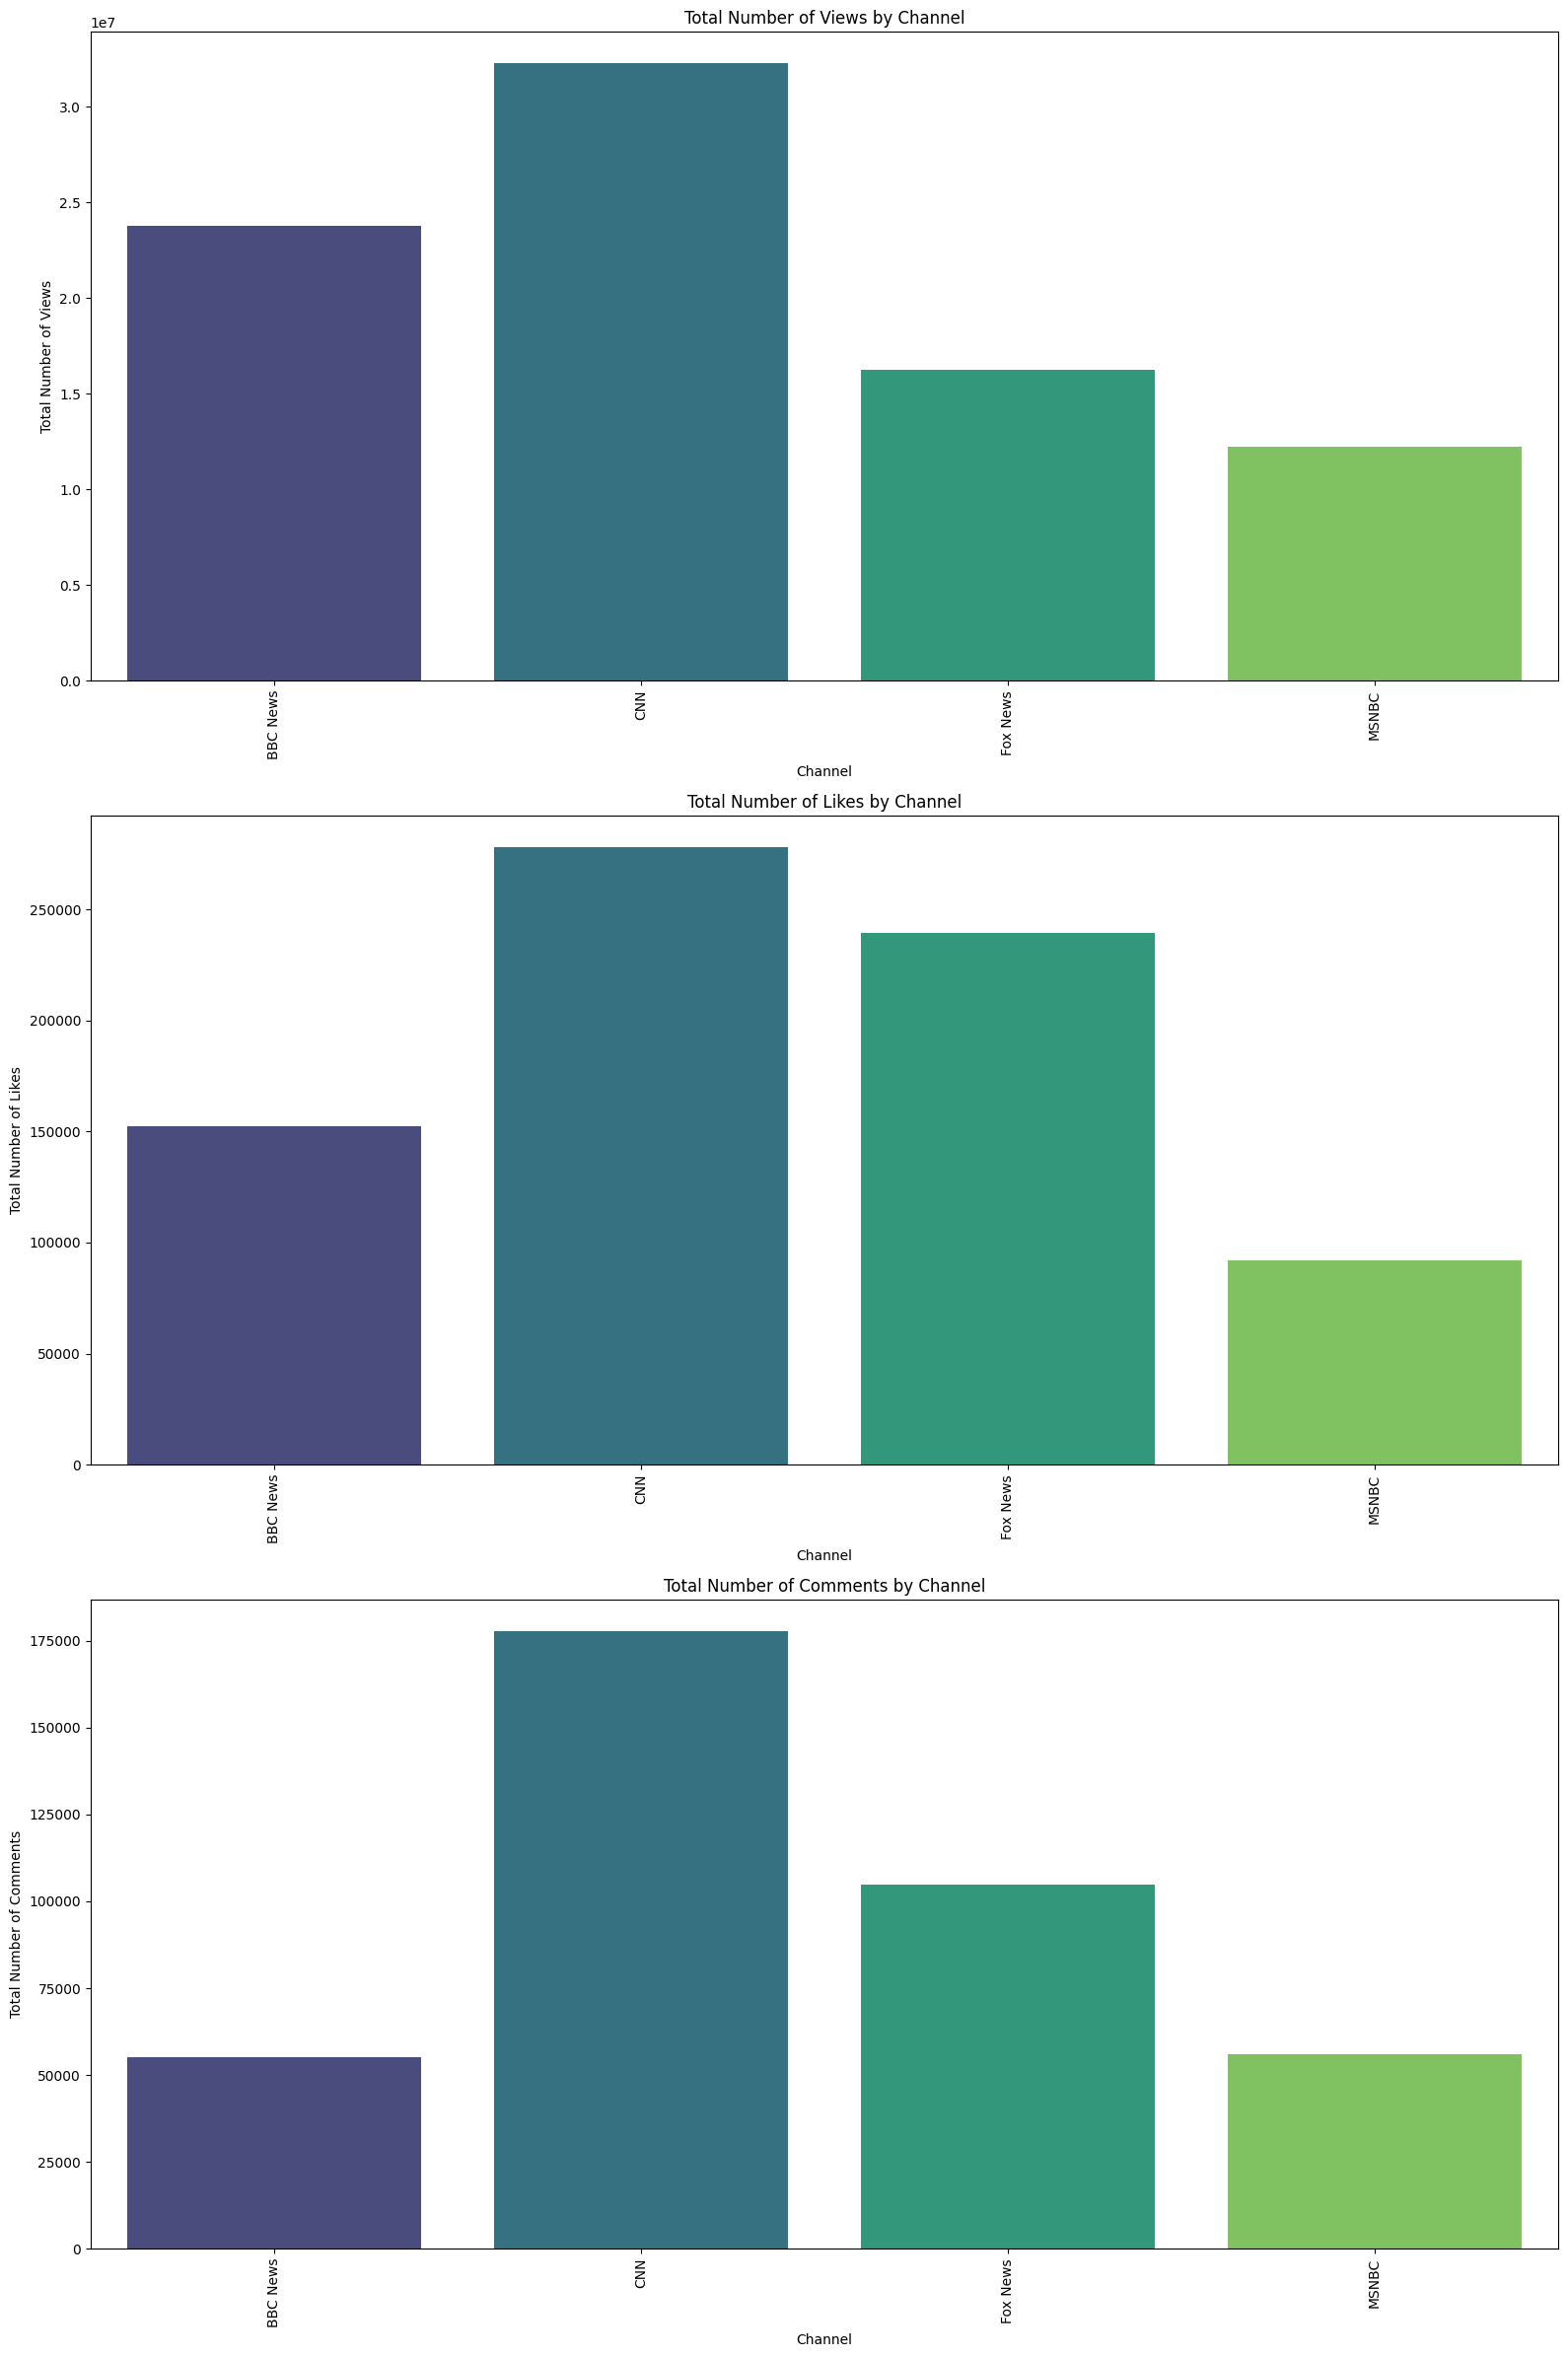

In [88]:
# Write your code here:

# Calculate total views, likes, and comments by publisher

# Create subplots

# Plot total number of views, likes, and comments by publisher

# Customize and display the plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the videos data
videos = pd.read_csv('videos.csv')  # Make sure this file is the cleaned version from the clean_data function

# Aggregate data by channel
channel_views = videos.groupby('channel_title')['view_count'].sum().reset_index()
channel_likes = videos.groupby('channel_title')['like_count'].sum().reset_index()
channel_comments = videos.groupby('channel_title')['comment_count'].sum().reset_index()

# Set the figure size and create subplots
fig, axes = plt.subplots(3, 1, figsize=(16, 24))

# Plot the total number of views by channel
sns.barplot(data=channel_views, y='view_count', x='channel_title', ax=axes[0], palette='viridis')
axes[0].set_title('Total Number of Views by Channel')
axes[0].set_ylabel('Total Number of Views')
axes[0].set_xlabel('Channel')
axes[0].tick_params(axis='x', rotation=90)

# Plot the total number of likes by channel
sns.barplot(data=channel_likes, y='like_count', x='channel_title', ax=axes[1], palette='viridis')
axes[1].set_title('Total Number of Likes by Channel')
axes[1].set_ylabel('Total Number of Likes')
axes[1].set_xlabel('Channel')
axes[1].tick_params(axis='x', rotation=90)

# Plot the total number of comments by channel
sns.barplot(data=channel_comments, y='comment_count', x='channel_title', ax=axes[2], palette='viridis')
axes[2].set_title('Total Number of Comments by Channel')
axes[2].set_ylabel('Total Number of Comments')
axes[2].set_xlabel('Channel')
axes[2].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


##### E.1.3. How has the number of comments changed over time? Use visualization to answer this question and annotate at least three major events related to Covid-19 (e.g., WHO declares pandemic) on your plot. Additionally, analyze the plot and try to identify any relationship between these events and the changes in the number of comments; discuss your observations.

In [89]:
# Write your code here:

# Create a figure and an axes object 

# Group the comments by week 

# Plot comments_by_week 

# Annonate the major events on the plot ..

# Customize and display the plot

##### E.1.4. How are the parent comments' likes distributed across different news publishers (channels)? Visualize the distributions using a violin plot and discuss your observations.

* A violin plot is a type of data visualization that combines the features of a box plot and a kernel density plot. It is used to show the distribution of a dataset, and provides information about the underlying data. The thickness of a violin plot represents the density of data points in that area of the plot. Thicker areas indicate a higher density of data points, while thinner areas indicate a lower density of data points. 

In [90]:
# Write your code here:

# Assign the `videos_comments` DataFrame to a new variable `df`

# Create a new column in the `df` DataFrame to indicate whether a comment is a parent or not

# Filter out non-parent comments using a boolean mask created from the `is_parent` column

# Create a violin plot of the data with a limited y-axis range

# Customize and display the plot

##### E.1.5. How are the comment replies distributed over time for different news publishers (channels)? Visualize the distributions using probability density functions.

In [91]:
# Write your code here:

# Group the comments by channel title

# Create a figure and axis object using the `subplots()` method 

# Loop through the channels and plot the probability density function for each

# Customize and display the plot

##### E.1.6. What are the top 5 videos with the highest ratio of likes to views? Display the URLs of these videos as well as their corresponding like counts, view counts, and like to view ratios. Discuss your observations. 

In [92]:
# Write your code here:

# Calculate the ratio of likes to views for each video

# Sort the videos by like to view ratio in descending order 

# Select the top 5 videos with the highest like ratio

# Display the URLs, like and view counts, and like to view ratios for the top 5 videos
import pandas as pd

# Load the videos data
videos = pd.read_csv('videos.csv')  # Make sure this file is the cleaned version from the clean_data function

# Calculate the like-to-view ratio
videos['like_to_view_ratio'] = videos['like_count'] / videos['view_count']

# Sort the videos by like-to-view ratio in descending order
top_videos = videos.sort_values(by='like_to_view_ratio', ascending=False).head(5)

# Select relevant columns
top_videos = top_videos[['url', 'like_count', 'view_count', 'like_to_view_ratio']]

# Display the top 5 videos
print(top_videos)

# Observations
for index, row in top_videos.iterrows():
    print(f"Video URL: {row['url']}")
    print(f"Likes: {row['like_count']}")
    print(f"Views: {row['view_count']}")
    print(f"Like to View Ratio: {row['like_to_view_ratio']:.4f}")
    print()


                                             url  like_count  view_count  \
47   https://www.youtube.com/watch?v=gsp691RCGRU        8771      262539   
36   https://www.youtube.com/watch?v=bf4WRdPnf4I         285        9163   
155  https://www.youtube.com/watch?v=QwGfY5CJJZ0         122        4128   
16   https://www.youtube.com/watch?v=3ebpS88BAwA         865       32892   
40   https://www.youtube.com/watch?v=N9TdWNrTLF8        1485       60843   

     like_to_view_ratio  
47             0.033408  
36             0.031103  
155            0.029554  
16             0.026298  
40             0.024407  
Video URL: https://www.youtube.com/watch?v=gsp691RCGRU
Likes: 8771
Views: 262539
Like to View Ratio: 0.0334

Video URL: https://www.youtube.com/watch?v=bf4WRdPnf4I
Likes: 285
Views: 9163
Like to View Ratio: 0.0311

Video URL: https://www.youtube.com/watch?v=QwGfY5CJJZ0
Likes: 122
Views: 4128
Like to View Ratio: 0.0296

Video URL: https://www.youtube.com/watch?v=3ebpS88BAwA
Likes: 865


##### E.1.7. Is there any relationship between the average length of the comments on a video and its like count? Visualize the relationship and discuss your observations. Exclude from your analysis the videos with no comments.

In [93]:
# Write your code here:

# Calculate the average comment length and like count for each video 

# Plot the relationship between average comment length and like count

# Customize and display the plot

#### E.2. Analyze the Videos and Comments - Part 2
* Choose **(only) 1** of the following questions (E.2.1 to E.2.7) and write Python code to answer them. 

##### E.2.1. What are the top 10 comments with the most replies? For each comment, display the Channel Title, Comment text, and the total number of replies that comment has received. Discuss your observations.

In [94]:
# Write your code here:

# Get the total number of replies to each comment

# Select comments without a parent comment_id (i.e., root comments)

# Get the top 10 root comments with the most replies

# Display the 'comment_text', 'channel_title', and 'reply_count' of the top 10 root comments


##### E.2.2. How does the average length of the comments (in characters) on a video vary with its duration? Analyze this for different news publishers (channels) using visualizations and discuss your observations.

In [95]:
# Write your code here:

# Create a new DataFrame containing only the comments data

# Add a new column to the DataFrame to store the length of each comment

# Group the comments DataFrame by video_id and calculate the mean comment length for each video

# Merge the videos DataFrame with grouped comments DataFrame 

# Create subplots for each channel

# Customize and display the subplots

##### E.2.3. How has the total number of comments per news publisher (channel) changed over months? Create a visualization to investigate this and discuss your observations. Make sure the outliers have been removed. 

In [96]:
# Write your code here:

# Convert the published_at column to a datetime object and extract year and month

# Calculate the total number of comments per channel_title and year_month

# Remove outliers

# Create a pivot table to group the data by year_month and channel_title

# Create, customize, and display the plot

##### E.2.4. How does the distribution of number of comments and likes vary across different news publishers (channels)? Use visualization to answer this question; discuss your observations. Make sure the outliers have been removed from the visualization. 

In [97]:
# Write your code here:

# Remove outliers

# Create a figure with two subplots

# Plot the distribution of comments and likes per news publisher

# Customize and display the plots

##### E.2.5. Is there a relationship between the duration of a video and receiving a below-average number of comments? Use visualization to answer this question; discuss your observations.

In [98]:
# Write your code here:

# Calculate average number of comments

# Add a column to indicate if a video has fewer comments than average

# Customize and display the plot

##### E.2.6. For a comment, Response Time (in seconds) is defined as the period between the time the comment is posted and the time the video is published. Use visualization to compare the distribution of the comment response times for different news publishers (channels). How does the median response time and interquartile range vary across the news publishers? discuss your observations. 

In [99]:
# Write your code here:

# Calculate response time for each comment

# Visualize the median, interquartile range, and outliers for each channel

# Customize and display the plot

##### E.2.7. Compare the average number of videos published per week across different news publishers (channels)? Use visualization and discuss your observations. 

In [100]:
# Write your code here:

# Group by channel_title and resample by week, counting the number of videos

# Calculate the average number of videos published per week for each channel

# Customize and display the plot

In [101]:
print(f" videos dataframe: {videos.dtypes} \n")
print(f" comments dataframe: {comments.dtypes} \n")
print(f"videos_comments dataframe: {pd.merge(videos,comments, how='inner', on ='video_id').dtypes} \n")

 videos dataframe: video_id               object
channel_id             object
video_title            object
channel_title          object
category_name          object
live_upcoming_none     object
view_count              int64
like_count              int64
dislike_count           int64
comment_count           int64
published_at           object
tags                   object
duration               object
definition             object
caption                  bool
thumbnail              object
url                    object
like_to_view_ratio    float64
dtype: object 

 comments dataframe: video_id                      object
comment_id                    object
comment_text                  object
comment_author                object
comment_date          datetime64[ns]
comment_like_count             int64
parent_comment_id             object
comment_date_week             object
comment_date_month            object
comment_date_year             object
dtype: object 

videos_comments da